# Pricing Analysis

Let's first load a public dataset on Amazon pricing that captures ratings for books from reviewers. These are easily available through xyz. 

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# df = pd.read_csv("/home/ratish/Downloads/09-19-Amazon-Ranking-Analysis.csv")
df = pd.read_csv("/home/ratish/Downloads/ratings_Books.csv",
                 names=["reviewer_id", "asin", "rating", "unix_review_time"])
# df = df[:1000000]

Now that we have the dataset available in dataframe object df, we can run a few initial manipulations to get a sense of the volume and unique number of rows. 

In [2]:
print("Number of reviews: ", df.rating.count())
print("Number of unique reviewers: ", df.reviewer_id.nunique())
print("Number of unique books: ", df.asin.nunique())
print("Average number of reviews per reviewer: ",df.reviewer_id.count()/df.reviewer_id.nunique())
print("Do reviewers write multiple reviews for the same book?:",df.groupby(['reviewer_id','asin']).count().rating.max(),"rating per reviewer and book")


Number of reviews:  1000000
Number of unique reviewers:  678854
Number of unique books:  31164
Average number of reviews per reviewer:  1.4730707928361622
Do reviewers write multiple reviews for the same book?: 1 rating per reviewer and book


## Distribution of number of reviews by rating

In [3]:
rating_buckets = df.groupby('rating').count()["reviewer_id"]
rating_pc = (rating_buckets/df.reviewer_id.count()) *100
# rating_pc
rating_pc.plot(kind="bar", title="Rating Distribution")

Let's see if there is a temporal bias in the ratings. I'm interested in finding out whether blah blah

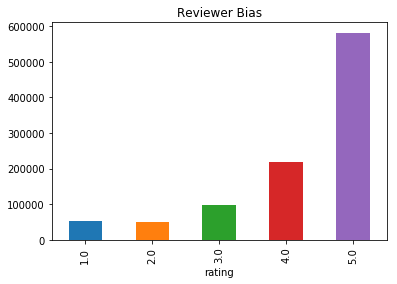

In [4]:
review_buckets = df.groupby('rating').count()["reviewer_id"]
review_buckets.plot(kind="bar", title="Reviewer Bias")

In [5]:
# [DONE]
# Total number of reviews
# Number of unique reviewers
# Number of unique books
# Avg number of reviews per user
# Do reviewers write multiple reviews for the same book?
# Plot of Distribution of rating (X-axis: rating, y-axis: percentage of reviews)

# [TO-DO]
# Pick the book with the most reviews and then show how its average rating has moved with time (human-readable).
# Do you think amateur reviewers rate poorly (are biased)?  Do you think experienced reviewers are more generous?

In [ ]:
def bub_unique(x):
    return x.nunique()
        
# Intention df.groupby('reviewer_bin').mean()["rating"] # Where reviwer_bin 
# is the bin of the number of counts of a given user. eg if number of users for user A are 13 and 
# bin size is 5, then reviewer_bin is ceil(13/5) = 2
df_with_index = df.set_index("reviewer_id", drop=False)
df_with_index["reviewer_counts"] = reviewer_counts
bin_size=10
df_with_index["reviewer_bin"] = df_with_index["reviewer_counts"]//bin_size
df_new = df_with_index.groupby("reviewer_bin").agg({'rating': np.mean, 'reviewer_id': bub_unique})
df_new.plot(y='rating', use_index=True, xlim=[0,9], style='ro-')